In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

terror = pd.read_csv("../data/globalterrorismdb_0617dist.csv", encoding='ISO-8859-1')


/tmp/ipykernel_5925/2593736.py:6: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror = pd.read_csv("../data/globalterrorismdb_0617dist.csv", encoding='ISO-8859-1')


In [64]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,201612310040,2016,12,31,NaN,0,NaN,146,Niger,11,...,NaN,"""15 soldiers killed, 19 injured in Niger terro...","""Niger: Boko Haram attack kills two soldiers i...",NaN,START Primary Collection,1,1,0,1,NaN
170346,201612310042,2016,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""AFP braces for more BIFF attacks in ARMM,"" Ma...","""Asia: US Army ASD Philippine Terrorist Media ...",NaN,START Primary Collection,-9,-9,0,-9,NaN
170347,201612310043,2016,12,31,NaN,1,NaN,229,Democratic Republic of the Congo,11,...,NaN,"""DRC Armed Forces Dislodge Ugandan LRA Rebels ...",NaN,NaN,START Primary Collection,1,1,0,1,NaN
170348,201612310044,2016,12,31,NaN,0,NaN,130,Mexico,1,...,There is doubt that this incident meets terror...,"""Gunmen shoot at home of Mexican indigenous ri...",""" Gunmen shoot at home of Mexican indigenous ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


STEP1

데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화.

In [65]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',\
                       'country_txt':'Country','region_txt':'Region',\
                        'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',\
                            'nwound':'Wounded','summary':'Summary','gname':'Group',\
                                'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                                'motive':'Motive'},inplace=True)

terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         170350 non-null  int64  
 1   Month        170350 non-null  int64  
 2   Day          170350 non-null  int64  
 3   Country      170350 non-null  object 
 4   Region       170350 non-null  object 
 5   city         169903 non-null  object 
 6   latitude     165744 non-null  float64
 7   longitude    165744 non-null  float64
 8   AttackType   170350 non-null  object 
 9   Killed       160668 non-null  float64
 10  Wounded      155025 non-null  float64
 11  Target       169712 non-null  object 
 12  Summary      104212 non-null  object 
 13  Group        170350 non-null  object 
 14  Target_type  170350 non-null  object 
 15  Weapon_type  170350 non-null  object 
 16  Motive       48586 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 22.1+ MB


In [66]:
start = 1970
end = 2017
terror_s = {}
for i in range(start,end, 1):
    terror_s[i] = 0
terror['tmp_happen'] = [1] * 170350

terror


/tmp/ipykernel_5925/331035832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror['tmp_happen'] = [1] * 170350


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,1
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,1
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",1
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,1


In [67]:
terroryear = terror.pivot_table(index = ['Year'], values = ['tmp_happen'], aggfunc = np.sum)

terroryear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1970 to 2016
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tmp_happen  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


/tmp/ipykernel_5925/817329222.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terroryear = terror.pivot_table(index = ['Year'], values = ['tmp_happen'], aggfunc = np.sum)


In [74]:
terroryear['tmp_happen'].sum()

terroryear

,tmp_happen
Year,
1970,651
1971,470
1972,496
1973,473
1974,580
1975,740
1976,923
1977,1319
1978,1526


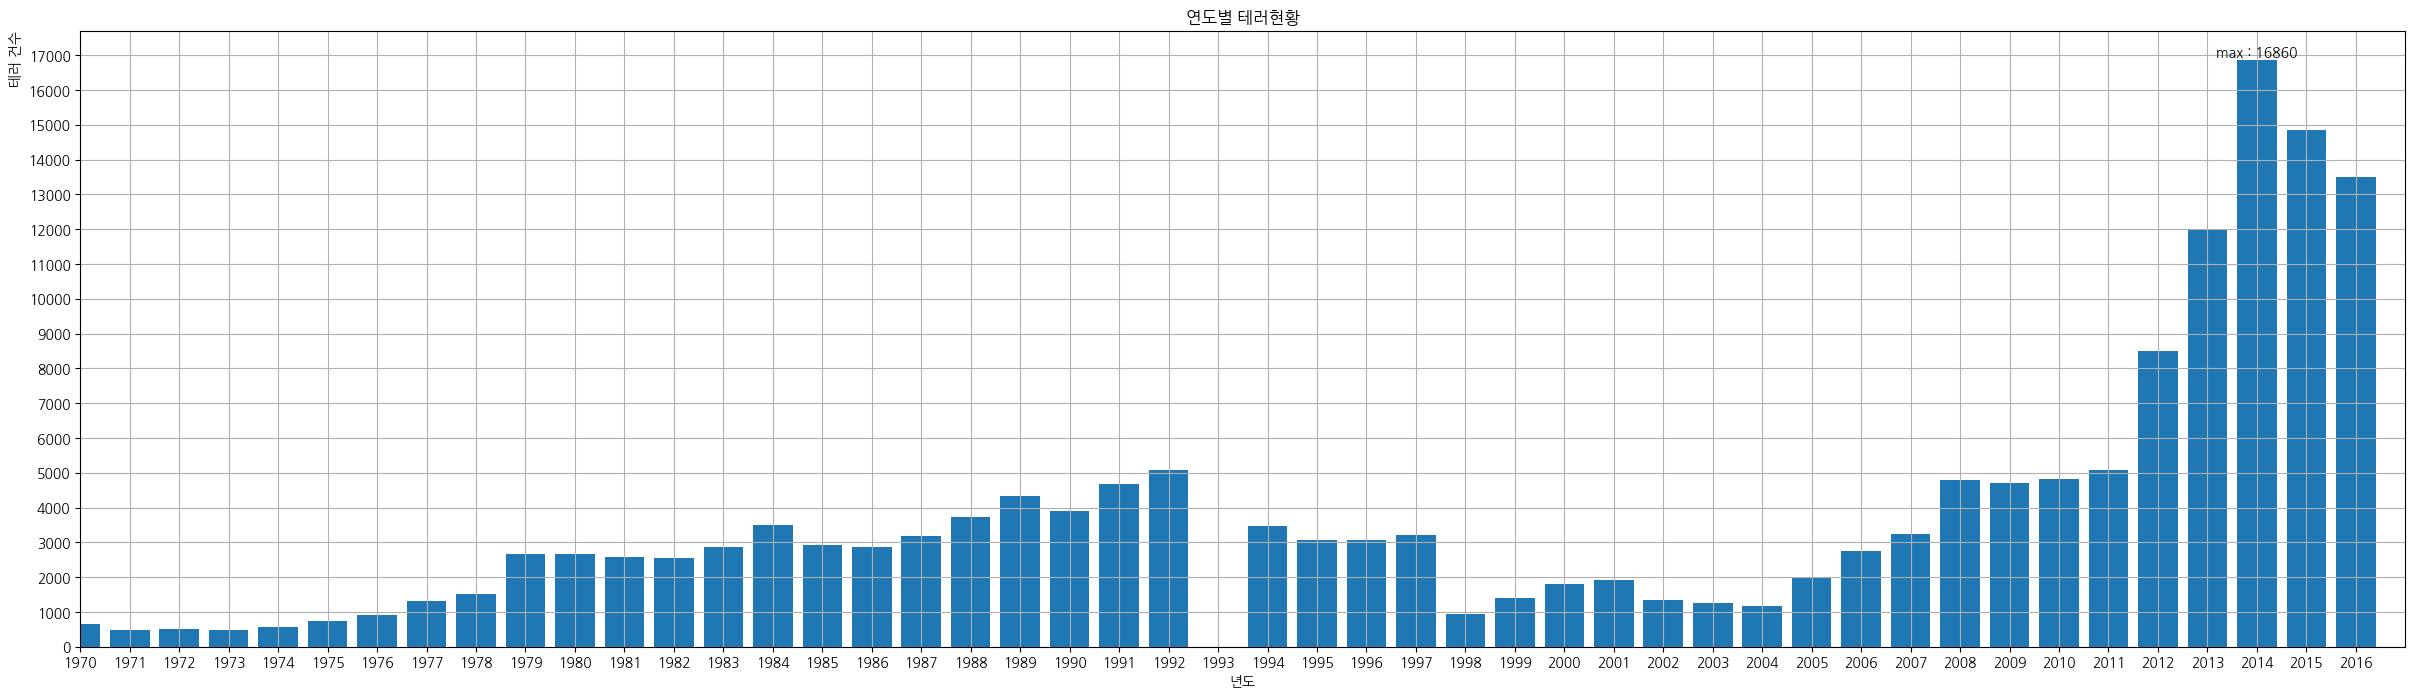

In [109]:
plt.figure(figsize=(30, 8))
plt.title("연도별 테러현황")
plt.bar(terroryear.index,terroryear['tmp_happen'])
plt.xlabel('년도')
plt.xticks(np.arange(1970, 2017, 1))
plt.yticks(np.arange(0, 18000, 1000))
plt.ylabel('테러 건수', loc='top')
plt.xlim(1970, 2017)
plt.text(terroryear.idxmax(),terroryear.max().values[0]+100,"max : {}".format(terroryear.max().values[0]),ha='center')
plt.grid()
plt.show()

In [104]:
terroryear.max().values[0]

16860

Step2. 전세계 테러데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화

In [110]:
terror

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,1
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,1
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",1
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,1


피벗테이블로 가져올 자료 : Contry, Region, city
인덱스는 Country
값은 tmp_happen
column은 나머지

In [177]:
terror_country1= terror.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_country1.sort_values('tmp_happen', ascending=False, inplace= True)

terror_country1.head(10)

/tmp/ipykernel_5925/3228238267.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_country1= terror.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Country,
Iraq,22130
Pakistan,13634
Afghanistan,11306
India,10978
Colombia,8163
Philippines,6212
Peru,6088
El Salvador,5320
United Kingdom,5098


In [128]:
terror_country = terror.pivot_table(index = ['Country'], columns= ['Year'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_country

/tmp/ipykernel_5925/2433490674.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_country = terror.pivot_table(index = ['Country'], columns= ['Year'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


tmp_happen                                               ...       \
Year              1970 1971 1972 1973 1974 1975 1976 1977 1978 1979  ... 2007   
Country                                                              ...        
Afghanistan          0    0    0    1    0    0    0    0    0    3  ...  340   
Albania              0    0    0    0    0    0    0    0    0    0  ...    0   
Algeria              0    0    1    0    0    0    1    0    1    1  ...  124   
Andorra              0    0    0    0    1    0    0    0    0    0  ...    0   
Angola               0    0    0    0    0    0    0    1    2    3  ...    0   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Yemen                0    0    0    0    0    0    0    0    0    0  ...    7   
Yugoslavia           0    0    0    1    1    0    0    1    0    0  ...    0   
Zaire                0    0    0    1    0    0    0    1    0    0  ...    0   
Zambia               0    1    0    1    0    1    0    1    3    1  ...    0   
Zimbabwe             0    0    0    0    0    0    0    0    0    0  ...    1   

                                                               
Year        2008 2009 2010 2011  2012  2013  2014  2015  2016  
Country                                                        
Afghanistan  415  502  541  421  1468  1441  1821  1927  1615  
Albania        0    1    0    0     0     1     2     4     2  
Algeria      107  108  100   15    41    22    13    16     9  
Andorra        0    0    0    0     0     0     0     0     0  
Angola         0    1    2    0     0     0     0     0     2  
...          ...  ...  ...  ...   ...   ...   ...   ...   ...  
Yemen         22   23  112  118   312   424   761   658   521  
Yugoslavia     0    0    0    0     0     0     0     0     0  
Zaire          0    0    0    0     0     0     0     0     0  
Zambia         0    0    0    0     0     0     0     0     0  
Zimbabwe       5    0    1    1     0     3     1     0     0  

[205 rows x 46 columns]

<h1>Step3. <h2>Step1의 특정연도 이전의 테러 경향과 그 후의 테러 경향 차이 확인</h2></h1>


2012년도 전후로 데이터 분석

관련 있어보이는 column = 나라, 도시, 타겟타입, 무기, 동기(motivate), 나라는 상위 10개 나라로만 분석

In [139]:
terror

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,1
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,1
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",1
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,1


In [147]:
#2012년 이전과 이후를 비교하기 위해 두개의 피벗테이블 분류
condition1 = terror['Year'] < 2012
condition2 = terror['Year'] >= 2012

terror_2012before = terror[condition1]
terror_2012after = terror[condition2]

In [152]:
terror_2012before

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104649,2011,12,31,Iraq,Middle East & North Africa,Khan Bani Saad,33.571807,44.536067,Armed Assault,5.0,0.0,5 Sahwa Militia members,12/31/2011: Five members of the Sahwa militia ...,Al-Qaida in Iraq,Terrorists/Non-State Militia,Firearms,Unknown,1
104650,2011,12,31,Pakistan,South Asia,Landi Kotal,34.116779,71.166515,Bombing/Explosion,2.0,13.0,Civilians,12/31/2011: Two children were killed and thirt...,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,Unknown,1
104651,2011,12,31,Iraq,Middle East & North Africa,Kirkuk,35.468830,44.390980,Bombing/Explosion,0.0,1.0,Civilian,12/31/2011: A civilian was wounded when a stic...,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,Unknown,1
104652,2011,12,31,Pakistan,South Asia,Boya,32.945308,69.897046,Bombing/Explosion,2.0,NaN,2 Pakistani soldiers,"12/31/2011: A remote-triggered, homemade roads...",Tehrik-i-Taliban Pakistan (TTP),Military,Explosives/Bombs/Dynamite,Unknown,1


In [150]:
terror_2012after

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
104654,2012,1,1,Pakistan,South Asia,Quetta,30.209423,67.018009,Bombing/Explosion,0.0,12.0,Paan Shop,01/01/2012: A grenade was thrown into a shop o...,Unknown,Business,Explosives/Bombs/Dynamite,NaN,1
104655,2012,1,1,Kenya,Sub-Saharan Africa,Garissa,-0.456120,39.646123,Armed Assault,3.0,14.0,Bar,01/01/2012: Assailants threw two grenades and ...,Al-Shabaab,Business,Explosives/Bombs/Dynamite,"The specific motive is unknown; however, Al-Sh...",1
104656,2012,1,1,Pakistan,South Asia,Sui,28.636116,69.186465,Bombing/Explosion,4.0,3.0,Soldiers,01/01/2012: A convoy of Frontier Corps (FC) so...,Baloch Republican Army (BRA),Military,Explosives/Bombs/Dynamite,NaN,1
104657,2012,1,1,Kenya,Sub-Saharan Africa,Garissa,-0.456120,39.646123,Armed Assault,2.0,14.0,Bar,01/01/2012: Assailants threw a grenade and ope...,Al-Shabaab,Business,Explosives/Bombs/Dynamite,"The specific motive is unknown; however, Al-Sh...",1
104658,2012,1,1,Pakistan,South Asia,Peer Chhatta,28.466667,67.283333,Hostage Taking (Kidnapping),0.0,0.0,Civilians,01/01/2012: Four men were kidnapped from their...,Unknown,Private Citizens & Property,Firearms,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,1
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,1
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",1
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,1


관련 있어보이는 column = 나라, 도시, 타겟타입, 무기, 동기(motivate)

In [168]:
terror_2012before_pt = terror_2012before.pivot_table(index = ['Country'],columns=['Target_type', 'Weapon_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_2012before_pt.to_csv("../data/terror_2012befor_pt.csv", )

/tmp/ipykernel_5925/1920363086.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_2012before_pt = terror_2012before.pivot_table(index = ['Country'],columns=['Target_type', 'Weapon_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


In [170]:
terror_2012before_pt_target = terror_2012before.pivot_table(index = ['Country'],columns=['Target_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_2012before_pt_target

/tmp/ipykernel_5925/3945091672.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_2012before_pt_target = terror_2012before.pivot_table(index = ['Country'],columns=['Target_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


tmp_happen                               \
Target_type Abortion Related Airports & Aircraft Business   
Country                                                     
Afghanistan                0                  41      258   
Albania                    0                   0        5   
Algeria                    0                  17      175   
Andorra                    0                   0        1   
Angola                     0                  12       47   
...                      ...                 ...      ...   
Yemen                      0                   3       43   
Yugoslavia                 0                   1       19   
Zaire                      0                   2        6   
Zambia                     0                   0        5   
Zimbabwe                   0                   0       12   

                                                          \
Target_type Educational Institution Food or Water Supply   
Country                                                    
Afghanistan                     155                    8   
Albania                           2                    0   
Algeria                          65                    2   
Andorra                           0                    0   
Angola                            1                    6   
...                             ...                  ...   
Yemen                             2                    0   
Yugoslavia                        1                    1   
Zaire                             0                    0   
Zambia                            0                    2   
Zimbabwe                          0                    1   

                                                                              \
Target_type Government (Diplomatic) Government (General) Journalists & Media   
Country                                                                        
Afghanistan                      92                  615                  31   
Albania                           3                   27                   4   
Algeria                          18                  165                  69   
Andorra                           0                    0                   0   
Angola                           14                   13                   2   
...                             ...                  ...                 ...   
Yemen                            23                   91                   2   
Yugoslavia                        7                   26                   4   
Zaire                             3                    8                   4   
Zambia                            3                   12                   1   
Zimbabwe                          0                   18                   4   

                               ...                                     \
Target_type Maritime Military  ... Police Private Citizens & Property   
Country                        ...                                      
Afghanistan        0      247  ...    488                         751   
Albania            0        1  ...      9                           9   
Algeria            2      369  ...    529                         893   
Andorra            0        0  ...      0                           0   
Angola             2       27  ...     12                         137   
...              ...      ...  ...    ...                         ...   
Yemen              1      106  ...     58                          46   
Yugoslavia         0       12  ...     78                          33   
Zaire              0        1  ...      1                           7   
Zambia             0        0  ...      0                          22   
Zimbabwe           0        5  ...      5                          25   

                                                              \
Target_type Religious Figures/Institutions Telecommunication   
Country                                           

In [171]:
terror_2012after_pt_target = terror_2012after.pivot_table(index = ['Country'],columns=['Target_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_2012after_pt_target

/tmp/ipykernel_5925/1308772348.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_2012after_pt_target = terror_2012after.pivot_table(index = ['Country'],columns=['Target_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


tmp_happen                               \
Target_type              Abortion Related Airports & Aircraft Business   
Country                                                                  
Afghanistan                             0                  23      173   
Albania                                 0                   0        1   
Algeria                                 0                   0        4   
Angola                                  0                   0        1   
Argentina                               0                   0        1   
...                                   ...                 ...      ...   
Uzbekistan                              0                   0        0   
Venezuela                               0                   0        1   
West Bank and Gaza Strip                0                   0       12   
Yemen                                   0                  12       79   
Zimbabwe                                0                   0        0   

                                                                       \
Target_type              Educational Institution Food or Water Supply   
Country                                                                 
Afghanistan                                  150                    5   
Albania                                        0                    0   
Algeria                                        2                    0   
Angola                                         0                    0   
Argentina                                      0                    0   
...                                          ...                  ...   
Uzbekistan                                     0                    0   
Venezuela                                      0                    0   
West Bank and Gaza Strip                       5                    0   
Yemen                                         42                    0   
Zimbabwe                                       0                    0   

                                                                       \
Target_type              Government (Diplomatic) Government (General)   
Country                                                                 
Afghanistan                                   50                  880   
Albania                                        0                    2   
Algeria                                        0                    7   
Angola                                         0                    0   
Argentina                                      2                    1   
...                                          ...                  ...   
Uzbekistan                                     1                    0   
Venezuela                                      1                    2   
West Bank and Gaza Strip                       3                   16   
Yemen                                         34                  317   
Zimbabwe                                       0                    1   

                                                                ...         \
Target_type              Journalists & Media Maritime Military  ... Police   
Country                                                         ...          
Afghanistan                               46        0     1722  ...   2628   
Albania                                    0        0        0  ...      1   
Algeria                                    1        0       38  ...     33   
Angola                                     0        0        1  ...      0   
Argentina                                  0        0        0  ...      1   
...                                      ...      ...      ...  ...    ...   
Uzbekistan                                 0        0        0  ...      0   
Venezuela                                  3        0        0  ...      5   
West Bank and Gaza Strip                   1        0      217  ...     83   
Yemen       

In [183]:

terror_country2012b= terror_2012before.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_country2012b.sort_values('tmp_happen', ascending=False, inplace= True)

terror_country2012b.head(20)

/tmp/ipykernel_5925/1344951064.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_country2012b= terror_2012before.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Country,
Iraq,7818
Colombia,7449
India,6911
Peru,6047
Pakistan,5521
El Salvador,5320
United Kingdom,4586
Philippines,3364
Spain,3231


In [245]:

terror_country2012a= terror_2012after.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_country2012a.sort_values('tmp_happen', ascending=False, inplace= True)

terror_country2012a.head(20)

/tmp/ipykernel_5925/1622989555.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_country2012a= terror_2012after.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Country,
Iraq,14312
Afghanistan,8272
Pakistan,8113
India,4067
Philippines,2848
Nigeria,2842
Yemen,2676
Somalia,2512
Libya,2035


우선 2012년 전 후로 테러수 1위는 이라크이다.
달라진것 나라에 대해 꺾은 선 그래프로 표시해보기

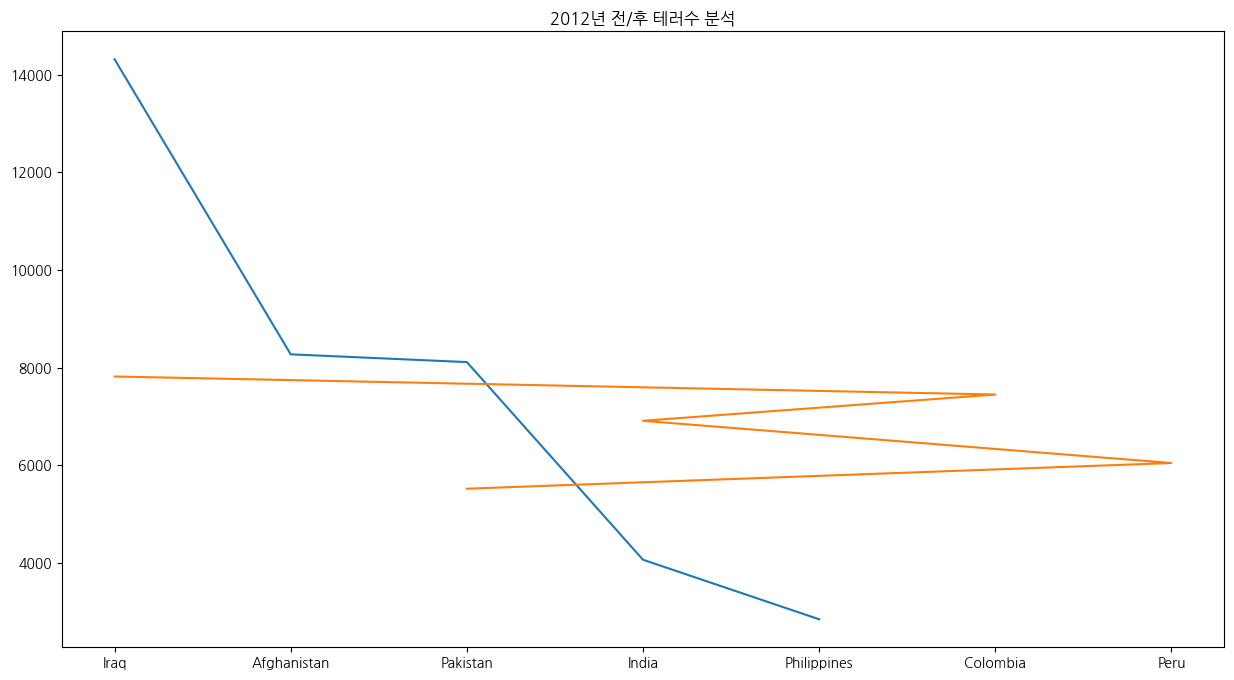

In [200]:
plt.figure(figsize=(15, 8))
plt.title("2012년 전/후 테러수 분석")
plt.plot(terror_country2012a.index[0:5], terror_country2012a['tmp_happen'][0:5])
plt.plot(terror_country2012b.index[0:5], terror_country2012b['tmp_happen'][0:5])


In [282]:

terror_region2012b= terror_2012before.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_region2012b.sort_values('tmp_happen', ascending=True, inplace= True)

terror_region2012b

/tmp/ipykernel_5925/1828051078.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region2012b= terror_2012before.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Region,
Australasia & Oceania,230
Central Asia,501
East Asia,698
Eastern Europe,2912
North America,3107
Southeast Asia,6451
Sub-Saharan Africa,7048
Central America & Caribbean,10316
Western Europe,15044


In [281]:

terror_region2012a= terror_2012after.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_region2012a.sort_values('tmp_happen', ascending=True, inplace= True)

terror_region2012a

/tmp/ipykernel_5925/442949783.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region2012a= terror_2012after.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Region,
Central America & Caribbean,24
Australasia & Oceania,34
Central Asia,53
East Asia,96
North America,239
South America,902
Western Europe,1263
Eastern Europe,2119
Southeast Asia,5002


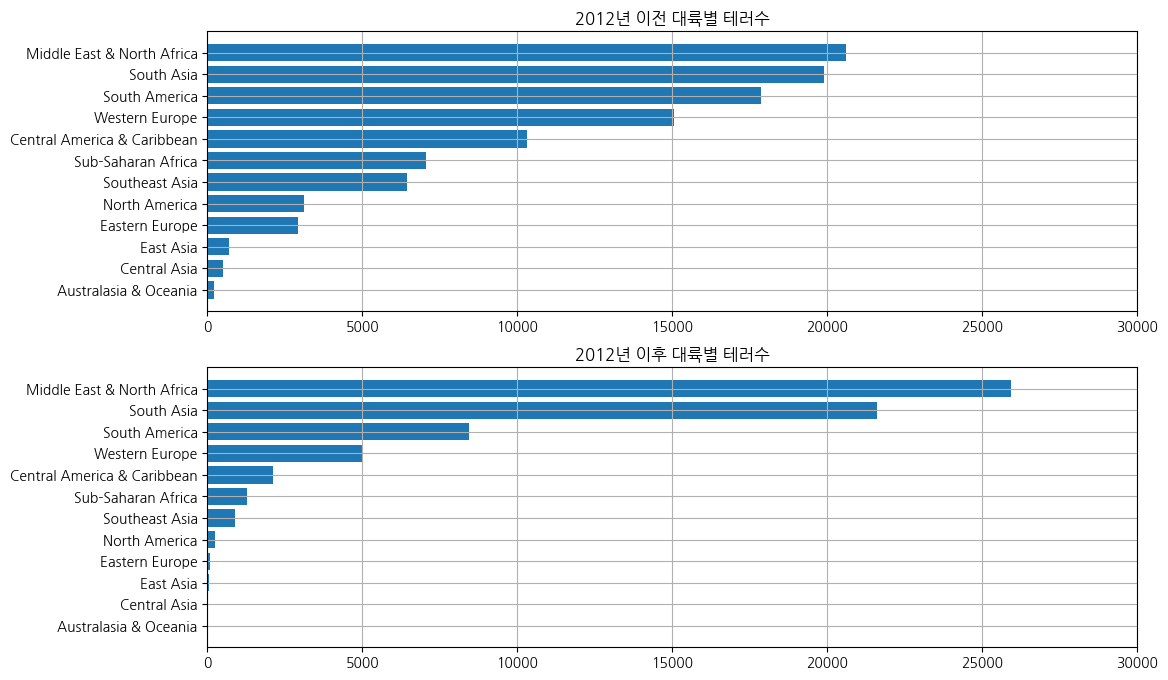

In [272]:

fig, ax = plt.subplots(2,1, figsize = (12, 8))


ax[0].barh(terror_region2012b.index, terror_region2012b['tmp_happen'])
ax[0].set_title("2012년 이전 대륙별 테러수")
ax[0].set_xlim([0, 30000])

ax[1].barh(terror_region2012b.index, terror_region2012a['tmp_happen'])
ax[1].set_title("2012년 이후 대륙별 테러수")
ax[1].set_xlim([0, 30000])

ax[0].grid()
ax[1].grid()
plt.show()

2012년 이전/이후 중동지역과 북아프리카, 남아시아는 테러수가 증가
남미는 테러수는 낮아졌지만 그래도 유의미한 값으로 존재

그래프에서 2012년의 전후로 추이를 살펴보기 위해 y축의 순서는 2012년 이전 그래프로 동일하게 맞추었음.

그래프의 전반적인 모양은 변하지 않았지만 
중동&북아프리카, 남아시아에 비해 다른 국가들은 절반 이상 줄었다고 볼 수 있음.

심지어 1,2위 대륙은 늘어났음.

In [379]:
terror_region2012b.index

Index(['Australasia & Oceania', 'Central Asia', 'East Asia', 'Eastern Europe',
       'North America', 'Southeast Asia', 'Sub-Saharan Africa',
       'Central America & Caribbean', 'Western Europe', 'South America',
       'South Asia', 'Middle East & North Africa'],
      dtype='object', name='Region')

In [409]:
terror_region1=terror.pivot_table(index = ['Year', 'Region'],values=['tmp_happen'], aggfunc=np.sum)

terror_region1.astype(int)

terror_region1

terror_region1.loc[2012]

/tmp/ipykernel_5925/3579307588.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region1=terror.pivot_table(index = ['Year', 'Region'],values=['tmp_happen'], aggfunc=np.sum)


,tmp_happen
Region,
Central America & Caribbean,1
Central Asia,12
East Asia,4
Eastern Europe,173
Middle East & North Africa,2408
North America,38
South America,133
South Asia,3799
Southeast Asia,586


In [383]:
terror_region=terror.pivot_table(index = ['Region', 'Year'],values=['tmp_happen'], aggfunc=np.sum)

terror_region.astype(int)

terror_region

terror_region.loc['North America'].index

/tmp/ipykernel_5925/889837474.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region=terror.pivot_table(index = ['Region', 'Year'],values=['tmp_happen'], aggfunc=np.sum)


Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Year')

In [398]:
tmp_terror_region =terror_region.loc[cnty]

tmp_terror_region.index

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Year')

0


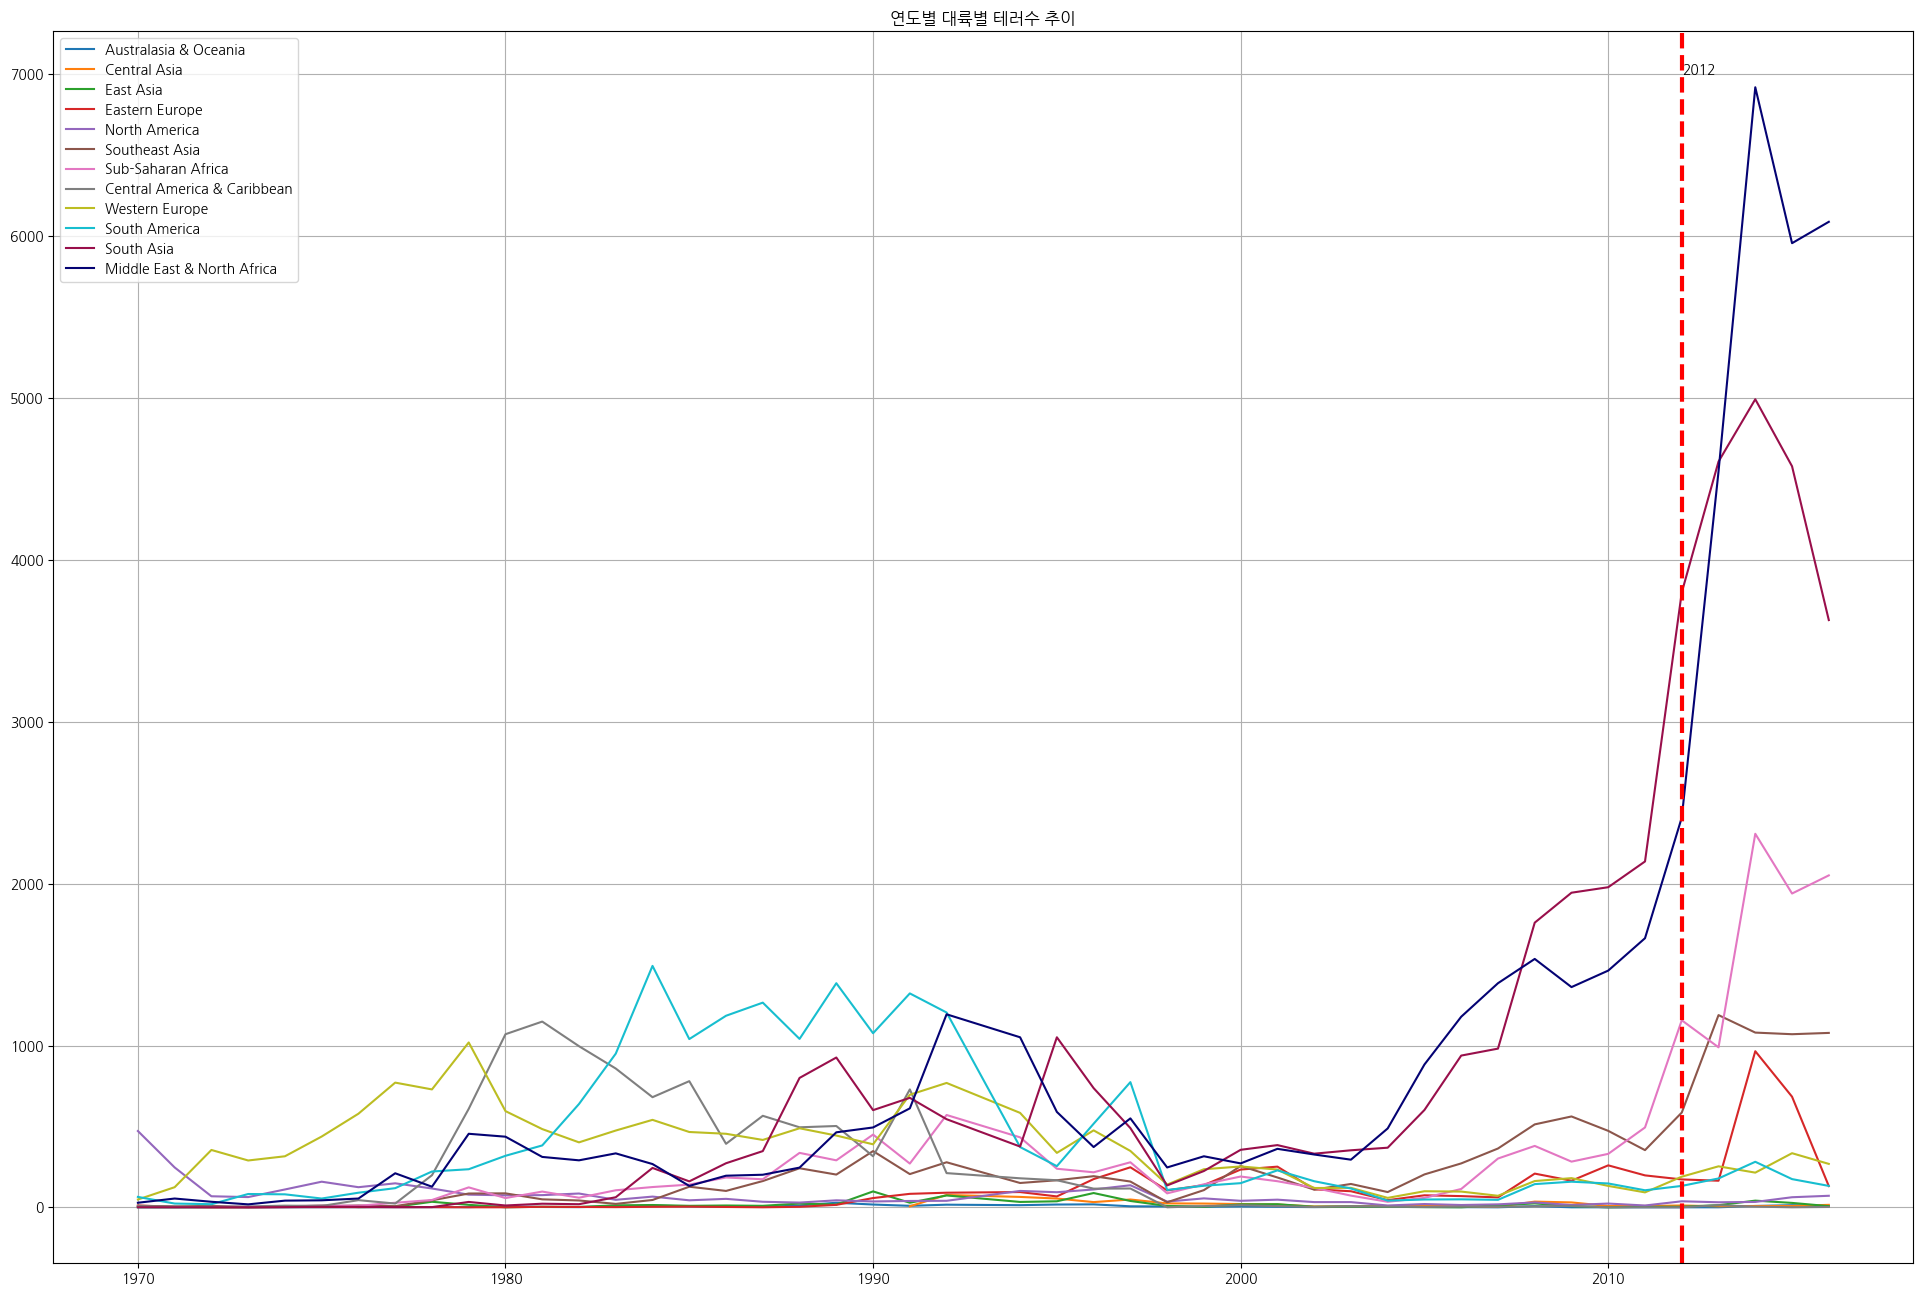

In [411]:
plt.figure(figsize=(24, 16))
plt.title("연도별 대륙별 테러수 추이")
count = 0
regionlist = ['Australasia & Oceania', 'Central Asia', 'East Asia', 'Eastern Europe',
       'North America', 'Southeast Asia', 'Sub-Saharan Africa',
       'Central America & Caribbean', 'Western Europe', 'South America',
       'South Asia', 'Middle East & North Africa']
colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',\
                '#17becf', '#990f4b', '#040273', '#0b8b87']
ci = 0
for cnty in regionlist:
    tmp_terror_region = terror_region.loc[cnty]
    
    plt.plot(tmp_terror_region.index , tmp_terror_region, label = '{}'.format(cnty), color = colorlist[ci])
    ci +=1 
   
print(count)
plt.xticks(np.arange(1970, 2017, 10))
plt.axvline(x = 2012, color = 'r', linestyle='--', linewidth = 3)
plt.text(2012, 7000, '2012')
plt.grid()
plt.legend()
plt.show()

In [286]:

terror_weapon2012b= terror_2012before.pivot_table(index = ['Weapon_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)
terror_weapon2012b.sort_values('tmp_happen', ascending=True, inplace= True)
terror_weapon2012b

/tmp/ipykernel_5925/1941241041.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_weapon2012b= terror_2012before.pivot_table(index = ['Weapon_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Weapon_type,
Radiological,13
Fake Weapons,31
Biological,32
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",54
Other,63
Sabotage Equipment,102
Chemical,196
Melee,2256
Incendiary,7740


In [284]:

terror_weapon2012a= terror_2012after.pivot_table(index = ['Weapon_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)
terror_weapon2012a.sort_values('tmp_happen', ascending=True, inplace= True)
terror_weapon2012a

/tmp/ipykernel_5925/4217802836.py:1: FutureWarning: The provided callable <function sum at 0x7cb9133bd5a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_weapon2012a= terror_2012after.pivot_table(index = ['Weapon_type'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Weapon_type,
Fake Weapons,2
Biological,3
Sabotage Equipment,28
Other,41
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",62
Chemical,97
Melee,1082
Incendiary,2719
Unknown,5083
